In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('mumbai.csv')
df.columns = df.columns.str.strip()

# Print the list of column names
columns_list = df.columns.tolist()
print(columns_list)
print(type(df))
df.columns = df.columns.str.strip()
# print(type(df))

# print(df.columns)
# df=df[['name','temp','datetime', 'cloudcover', 'solarradiation', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',]]

print(df.head())


['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations']
<class 'pandas.core.frame.DataFrame'>
     name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  mumbai  2021-07-01     31.8     28.0  30.0          39.7          33.6   
1  mumbai  2021-07-02     32.0     28.0  30.0          39.7          33.6   
2  mumbai  2021-07-03     32.4     28.8  30.3          40.2          34.3   
3  mumbai  2021-07-04     32.4     28.7  30.4          40.1          34.6   
4  mumbai  2021-07-05     32.7     28.0  30.6          41.1          34.6   

   feelslike   dew  humidity  ...  solarenergy  uvindex  severerisk  \
0       36.6  

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame with 6 features and 1 target
# X contains features, y contains target variable
df['target']=df['preciptype']
df2=df[['temp','dew','humidity','solarenergy','solarradiation','moonphase','target']]
df['target'] = np.where(df['target'].isnull(), 0, 1)
# from sklearn.preprocessing import LabelEncoder

# df['target'].fillna('NaN', inplace=True)

# # Create a LabelEncoder
# label_encoder = LabelEncoder()

# # Fit label encoder and transform the target variable
# df['target2'] = label_encoder.fit_transform(df['target'].astype(str))
# # Count the occurrences of each class in the target variable
# class_counts = df['target2'].value_counts()

# # Print the counts for each class
# print("Class Counts:")
# print(class_counts)

X = df2.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors here

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)


KNN Accuracy: 0.9343434343434344


In [3]:
from sklearn.svm import SVC

# Create a Support Vector Machine classifier
svm_classifier = SVC()

# Train the model
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.9090909090909091


In [4]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100)  # You can adjust the number of estimators here

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.9141414141414141


In [5]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_reg = LogisticRegression()

# Train the model
logistic_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = logistic_reg.predict(X_test_scaled)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)


Logistic Regression Accuracy: 0.898989898989899


In [6]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_nb = naive_bayes.predict(X_test_scaled)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)


Naive Bayes Accuracy: 0.8787878787878788


In [7]:
from sklearn.neural_network import MLPClassifier

# Create a Multi-Layer Perceptron (Neural Network) classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000)  # You can adjust the parameters here

# Train the model
mlp_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_nn = mlp_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", accuracy_nn)


Neural Network Accuracy: 0.9242424242424242


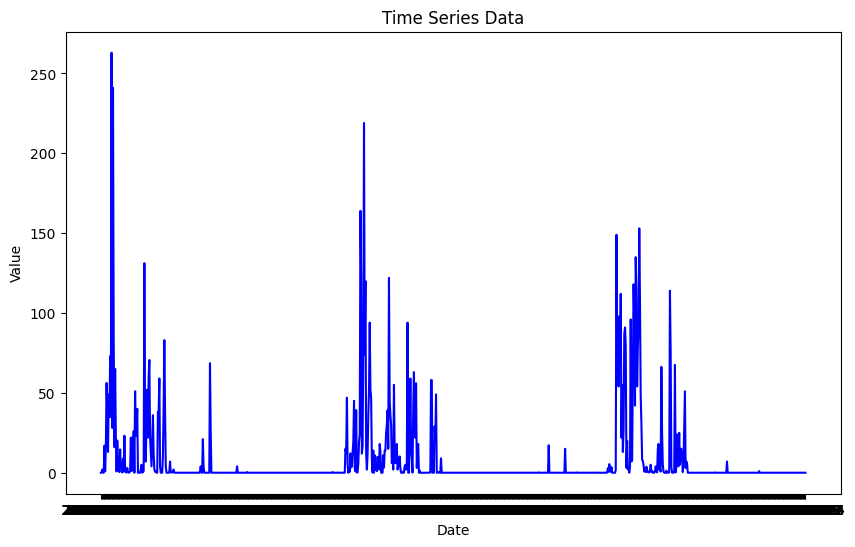

In [15]:
import matplotlib.pyplot as plt

# Assuming 'df' is your time series DataFrame with a datetime index
# Replace 'column_name' with the name of the column you want to visualize

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['precip'], color='blue', linestyle='-')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')

# Remove grey grid lines
plt.grid(color='white')

plt.show()


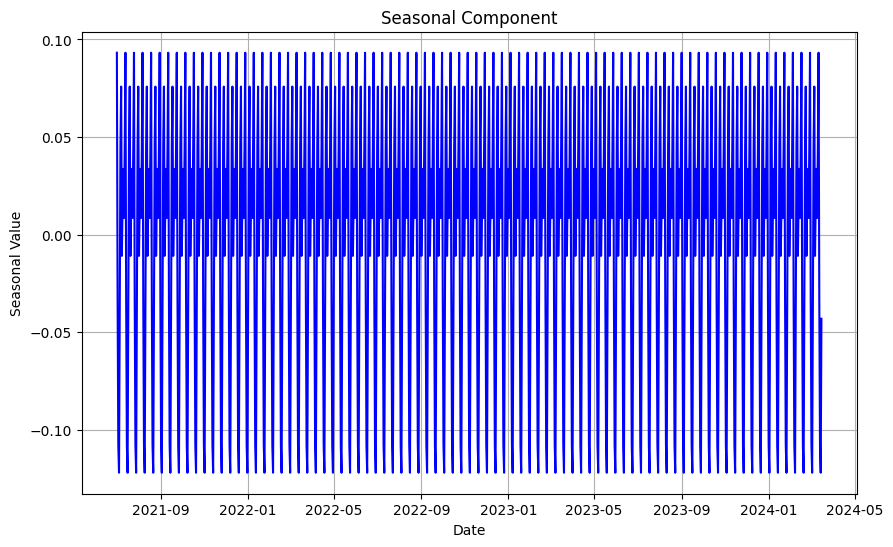

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df' is your time series DataFrame with a datetime index and 'column_name' is the column you want to analyze

# Perform seasonal decomposition
result = seasonal_decompose(df['temp'], model='additive', period=12)  # Specify the period based on your data's seasonality

# Extract seasonal component
seasonal_component = result.seasonal

# Plot the seasonal component
plt.figure(figsize=(10, 6))
plt.plot(seasonal_component, color='blue')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal Value')
plt.grid(True)
# plt.show()


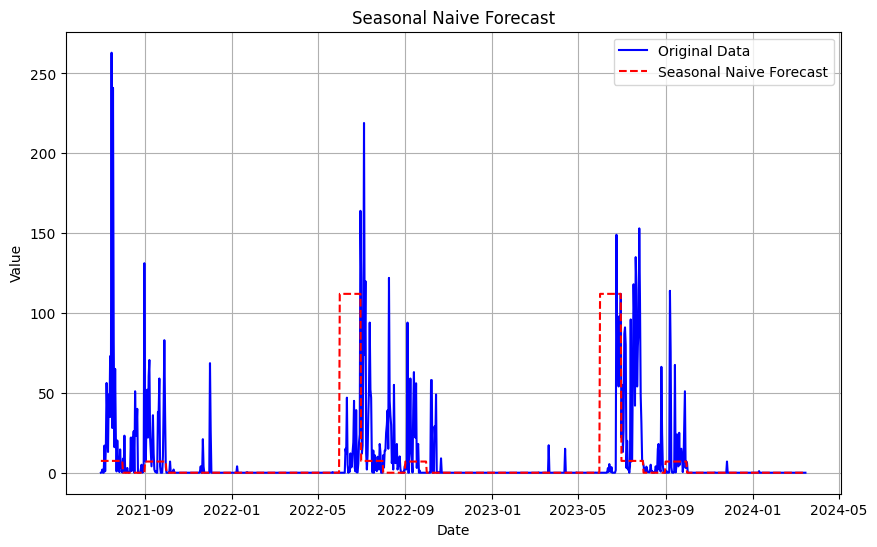

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your time series DataFrame with a datetime column named 'datetime_column' and 'column_name' is the column you want to analyze

# Set the datetime column as the index
df['datetime2'] = pd.to_datetime(df['datetime'])
df.set_index('datetime2', inplace=True)

# Extract the last observed value for each season
last_observed_season = df.groupby(df.index.month)['precip'].last()

# Create a DataFrame to store the forecasts
forecast_df = pd.DataFrame(index=df.index, columns=['seasonal_naive_forecast'])

# Assign the last observed value for each season to the corresponding forecast period
for month in range(1, 13):
    forecast_df.loc[forecast_df.index.month == month, 'seasonal_naive_forecast'] = last_observed_season[month]

# Plot the original data and the seasonal naive forecasts
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['precip'], color='blue', label='Original Data')
plt.plot(forecast_df.index, forecast_df['seasonal_naive_forecast'], color='red', linestyle='--', label='Seasonal Naive Forecast')
plt.title('Seasonal Naive Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['precip'], forecast_df['seasonal_naive_forecast'])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(df['precip'], forecast_df['seasonal_naive_forecast']))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 12.45298281092012
Root Mean Squared Error (RMSE): 33.57431971594169


c:\Users\adiln\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\adiln\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


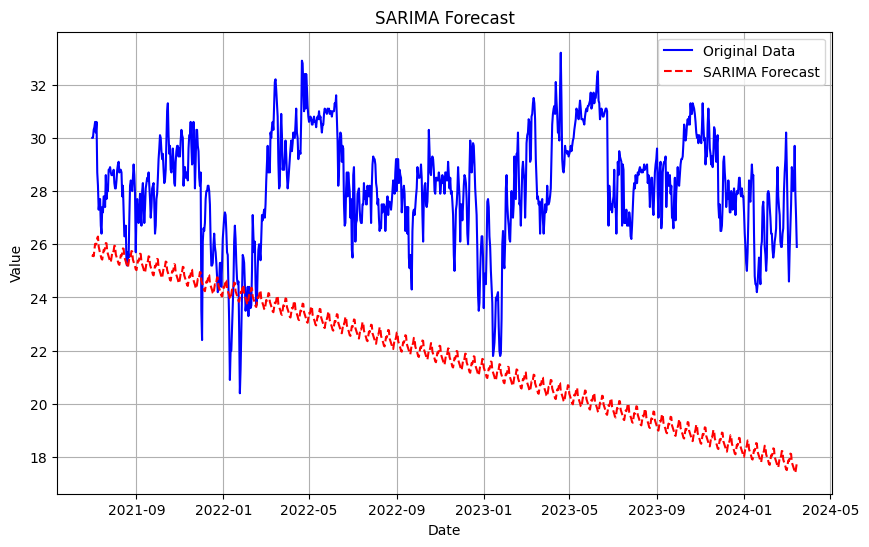

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'df' is your time series DataFrame with a datetime column named 'datetime_column' and 'column_name' is the column you want to analyze

# Set the datetime column as the index
df['datetime2'] = pd.to_datetime(df['datetime'])
df.set_index('datetime2', inplace=True)

# Fit SARIMA model
sarima_model = SARIMAX(df['temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Make forecasts
forecast = sarima_result.forecast(steps=len(df))

# Plot the original data and the SARIMA forecasts
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['temp'], color='blue', label='Original Data')
plt.plot(df.index, forecast, color='red', linestyle='--', label='SARIMA Forecast')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your data
data = pd.read_csv("mumbai.csv", index_col="datetime", parse_dates=True)  # Replace with your data path

# Drop rows with missing values
data.dropna(inplace=True)

# Resample the data at a daily frequency and calculate the mean
data_resampled = data.resample("D").mean()

# Check for seasonality in your data
seasonality = len(data_resampled)

# Define the ETS model
model = ExponentialSmoothing(
    data_resampled["precip"],  # Adjust the column name as per your data
    trend="add",  # Additive trend
    seasonal="add",  # Additive seasonality
    seasonal_periods=seasonality,
)

# Fit the model
model_fit = model.fit()

# Generate forecasts for future periods
n_periods = 12  # Number of future periods to forecast
forecast = model_fit.forecast(steps=n_periods)

# Print or plot the forecast
print(forecast)


TypeError: agg function failed [how->mean,dtype->object]